# Movie Recommendation System

In [6]:
!pip install wordcloud

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

sns.set_style('darkgrid')

In [9]:
## reading dataset 

df_movies = pd.read_csv(r'movies.csv')
df_rating = pd.read_csv(r'ratings.csv')

In [10]:
## displaying first 5 rows of movies dataset
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
## displaying last 5 rows of ratings dataset
df_rating.tail()

,userId,movieId,rating,timestamp
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898
105338,668,148626,4.5,1451148148


In [12]:
print("Movies data shape: ", df_movies.shape)
print("Ratings data shape: ", df_rating.shape)

Movies data shape:  (10329, 3)
Ratings data shape:  (105339, 4)


In [13]:
## checking null values in movies dataset
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [14]:
## checking null values in ratings dataset
df_rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [15]:
df_movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Children|Comedy',
       'Drama|Mystery', 'Drama|Thriller', 'Comedy|Crime',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller'

In [16]:
total_genres = []

for g in df_movies.genres:
    g = g.split('|') ## spliting every generes from '|'
    ## checking if the is not present in the list 
    if g not in total_genres:
        total_genres.append(g)

In [17]:
total_genres

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Children', 'Drama'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Romance', 'IMAX'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Thriller'],
 ['Mystery', 'Thriller'],
 ['Animation', 'Children', 'Drama', 'Musical', 'Romance'],
 ['Crime', 'Mystery', 'Thriller'],
 ['

In [18]:
df_movies.title.head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [19]:
df_movies.title[0][:-7]

'Toy Story'

In [20]:
year, title = [], []
for t in df_movies.title:
    title.append(t[:-7])
    year.append(t[-7:])

In [21]:
year[:5], title[:5]

([' (1995)', ' (1995)', ' (1995)', ' (1995)', ' (1995)'],
 ['Toy Story',
  'Jumanji',
  'Grumpier Old Men',
  'Waiting to Exhale',
  'Father of the Bride Part II'])

In [22]:
word_cloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2 ,
                        min_word_length=3).generate(str(total_genres))

word_cloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2 ,
                        min_word_length=3).generate(str(title))

## Plotting Movies Genres

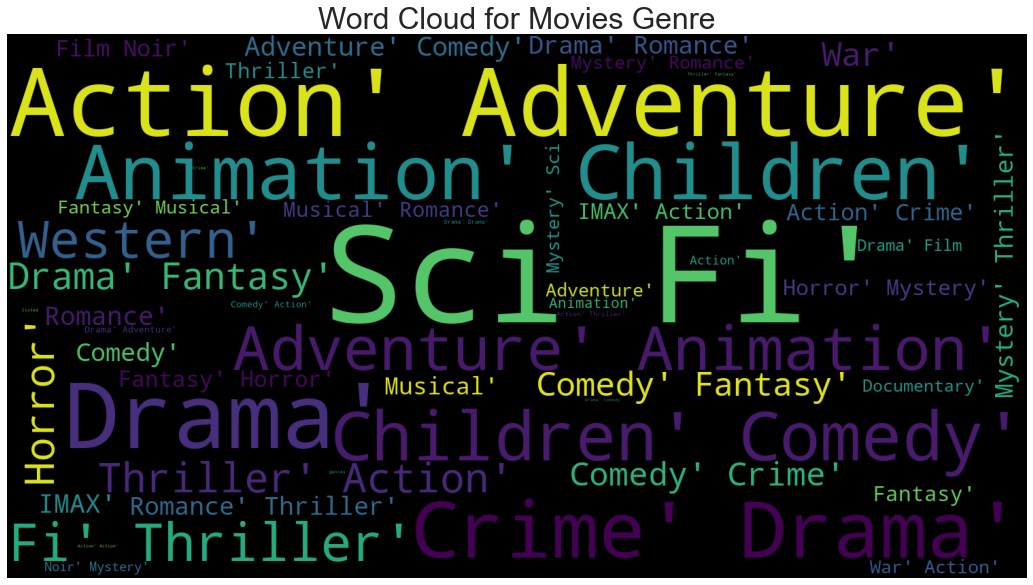

In [23]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Genre',fontsize=30)
plt.imshow(word_cloud_genre);

## Plotitng Movies Titles

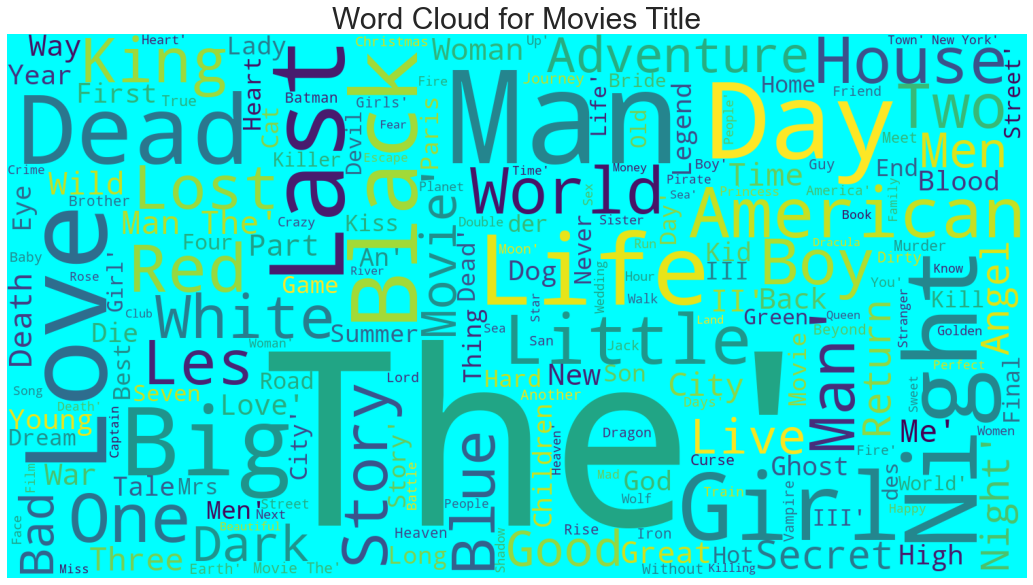

In [24]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Title',fontsize=30)
plt.imshow(word_cloud_title);

## Merging both df_movies and df_rating dataset

In [25]:
final_df = pd.merge(df_rating, df_movies, how='left',on='movieId')

In [26]:
final_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [27]:
title_rating = final_df.groupby(['title'])[['rating']].sum()
title_rating = title_rating.nlargest(10,'rating')
title_rating.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


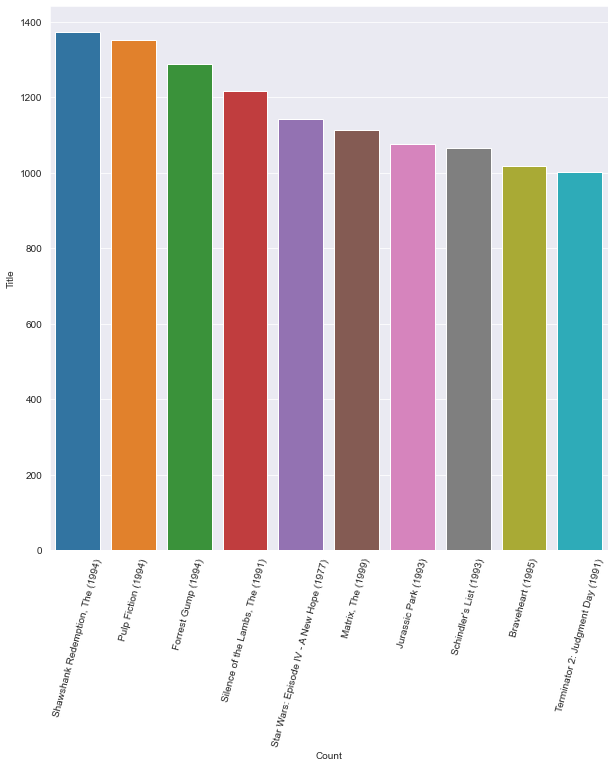

In [28]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=75);
sns.barplot(title_rating.index, title_rating['rating']);
plt.ylabel('Title');
plt.xlabel('Count');

In [29]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_movies['genres'])

In [30]:
movie_user = final_df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
cos_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [45]:
indices=pd.Series(df_movies.index,index=df_movies['title'])

titles=df_movies['title']

def recom_sys(title):
    idx = indices[title]
    similarity_scores = list(enumerate(cos_similarity[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:21]
    movie_indices = [i[0] for i in similarity_scores]
    return titles.iloc[movie_indices]

In [47]:
list(enumerate(cos_similarity[2]))

[(0, 0.15892219564040727),
 (1, 0.0),
 (2, 1.0),
 (3, 0.8987946616469749),
 (4, 0.6023503818026228),
 (5, 0.0),
 (6, 1.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.8987946616469749),
 (11, 0.31864593772227523),
 (12, 0.0),
 (13, 0.0),
 (14, 0.4356685633567705),
 (15, 0.0),
 (16, 0.681146113980791),
 (17, 0.6023503818026228),
 (18, 0.6023503818026228),
 (19, 0.22765896130068985),
 (20, 0.2823355525030785),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.681146113980791),
 (25, 0.0),
 (26, 0.0),
 (27, 0.681146113980791),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.32808371305155715),
 (33, 0.0),
 (34, 0.681146113980791),
 (35, 0.0),
 (36, 1.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.33861585351910994),
 (43, 0.681146113980791),
 (44, 0.0),
 (45, 0.2793403513666662),
 (46, 0.681146113980791),
 (47, 0.0),
 (48, 0.8987946616469749),
 (49, 0.0),
 (50, 0.28044771400067037),
 (51, 0.0),
 (52, 0.0),
 (53, 0.8987946616469749),
 (54, 0.0),
 (55, 0.0),
 (56, 0.

In [50]:
len(cos_similarity[2])

10329

In [36]:
cos_similarity.shape


(10329, 10329)